<h1>Netflix Titles Analysis</h1>

This data analysis project examines the Netflix dataset, focusing on various 
aspects of the titles available on the platform, such as the distribution of content types, 
ratings, countries of origin, and trends in movie duration. By leveraging data visualization techniques, 
this project aims to provide insights into Netflix's content library. 

<h2>Dataset</h2>
<p>The dataset used in this analysis is the netflix_titles.csv file, which contains information about Netflix's available movies and TV shows. It includes columns such as type, title, director, country, date_added, rating, and duration.</p>


<h2>Data Cleaning</h2>
<p>Before proceeding with the analysis, data cleaning steps were performed to ensure the dataset's quality:</p>
<ul>
<li><b>Missing Values:</b> Identified and dropped any missing values to maintain data integrity.</li>
<li><b>Date Conversion:</b> Converted the date_added column to datetime format and extracted the year for further analysis.</li>
</ul>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

<h2>Loading the Dataset</h2>

<p>We start by loading the Netflix dataset using pandas' read_csv() function. This dataset contains information 
about Netflix's available movies and TV shows, including columns such as 'type', 'title', 'director', 'cast', 
'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', and 'description'.</p>


In [22]:
df = pd.read_csv('netflix_titles.csv')

<h2>Displaying the First Few Rows</h2>
<p>To get a quick overview of the data structure and content, we display the first five rows of the DataFrame 
using the head() method.</p>

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2>Checking for Missing Values</h2>

<p> We check for missing values in each column using isnull().sum(). This step is crucial for identifying 
columns with incomplete data, which could impact our analysis. The output shows the number of missing values 
in each column, helping us decide on the appropriate data cleaning steps.</p>


In [24]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h2> Dropping Missing Values</h2>

<p>To simplify our analysis, we drop all rows with missing values using the dropna() method. While this approach 
reduces the dataset size, it ensures that the remaining data is complete and ready for analysis. 
We verify that there are no more missing values by using isnull().sum() again.</p>


In [25]:
df=df.dropna()
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h2> Converting Date Column to Datetime</h2>

<p> We convert the 'date_added' column from a string format to a datetime object using pd.to_datetime(). 
This conversion allows us to perform date-related operations more easily. Additionally, we extract the year 
from the 'date_added' column and store it in a new column called 'added_year'. This helps us analyze trends 
over time. After cleaning the data and making the necessary conversions, we use head() again to display the first few rows 
of the cleaned DataFrame.</p>


In [27]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021


# Descriptive Data Analysis
<p>This project aims to analyze the Netflix dataset to gain insights into the content available on the platform. We will explore various aspects of the data, including content distribution, directors, ratings, country contributions, and trends in movie durations. This analysis will help us understand the diversity and trends in Netflix's offerings.
</p>




<h2>Distribution of Content Types</h2>
<p>The dataset includes two primary types of content: movies and TV shows. The pie chart below visualizes the distribution between these two categories.</p>

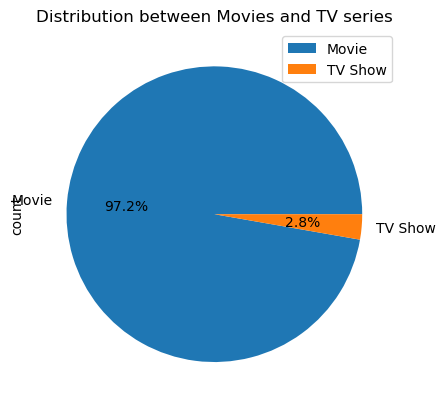

In [28]:
df.type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution between Movies and TV series")
plt.legend()
plt.show()

<h2>Top 10 Directors</h2>

<p>Next, we examine the top 10 directors with the most content on Netflix. This information can be useful to identify prolific directors who contribute significantly to the platform's offerings.</p>

In [30]:
df.director.value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: count, dtype: int64

<h2>Comparison of Ratings</h2>

<p>The following chart compares the distribution of ratings for movies and TV shows on Netflix. This analysis provides insights into the variety and appropriateness of content for different audiences.</p>

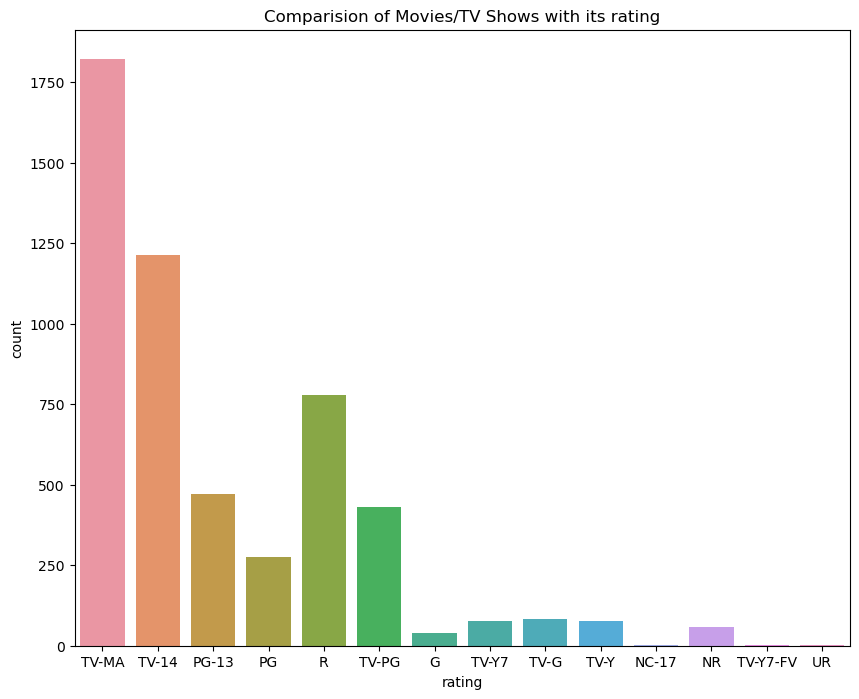

In [31]:
plt.figure(figsize=(10,8))
sea.countplot(data=df, x='rating')
plt.title('Comparision of Movies/TV Shows with its rating')
plt.show()

<h2>Country Contribution to Netflix Content</h2>

<p>We analyze the top 10 countries contributing the most content to Netflix. The bar chart below shows the number of movies and TV shows produced by each country.</p>

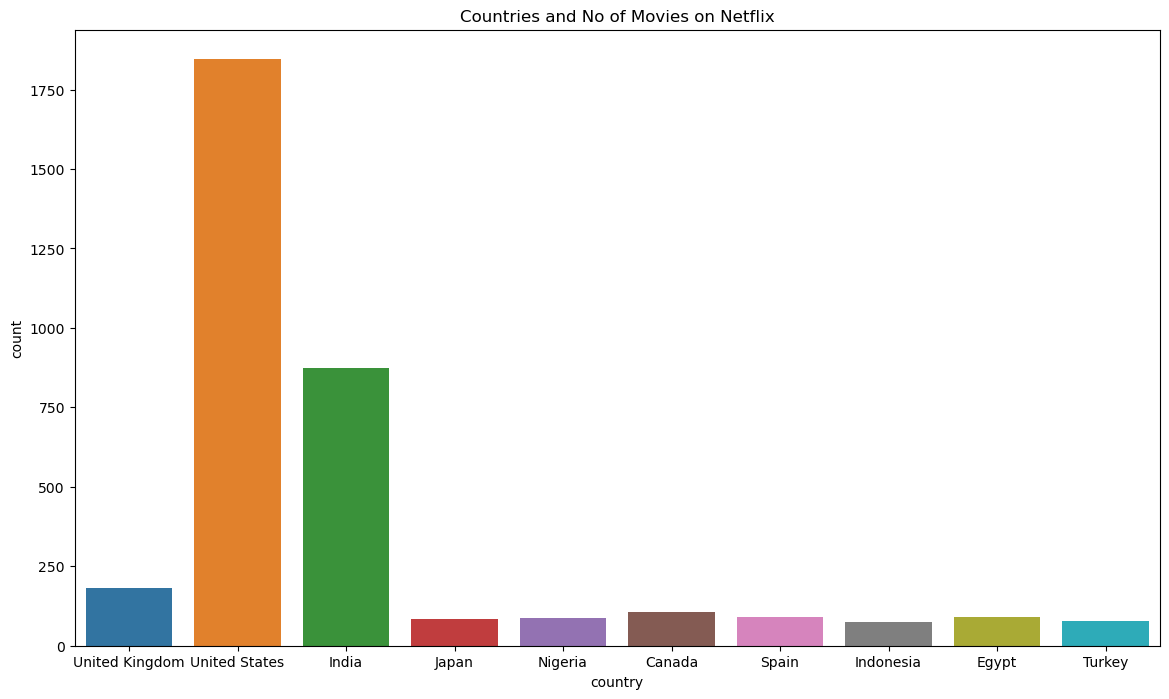

In [32]:
plt.figure(figsize=(14,8))
top_country=df['country'].value_counts().head(10).index
df_ten=df[df['country'].isin(top_country)]
sea.countplot(data=df_ten,x='country')
plt.title("Countries and No of Movies on Netflix")
plt.show()

<p>Additionally, we visualize the proportion of content from top countries using a pie chart, with the remaining countries grouped into an "Others" category.</p>

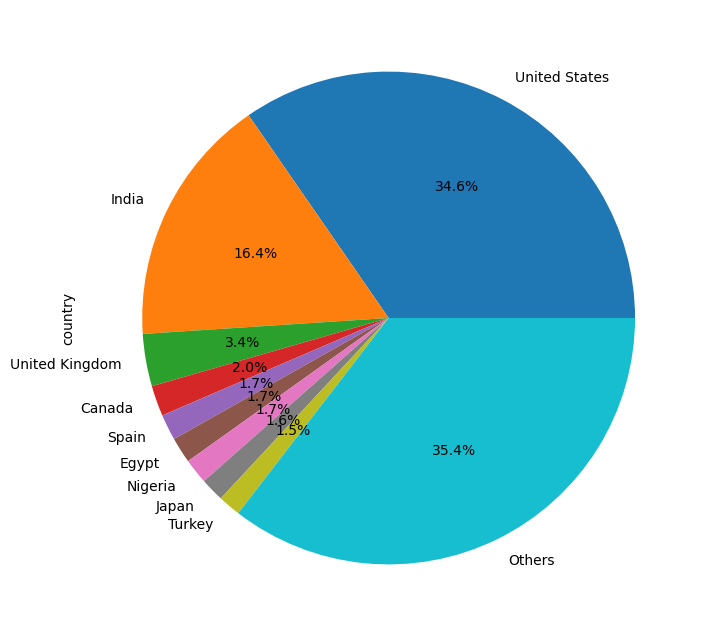

In [18]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(9)
others_count = country_counts[9:].sum()
top_countries['Others'] = others_count
plt.figure(figsize=(10, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%')
plt.show()

<h2>Trend in Average Duration of Movies</h2>

<p>We focus on movies to analyze trends in their average duration over the years they were added to Netflix. This can indicate changes in content length preferences or production practices.</p>

<p>First, we convert the duration column to a numeric format for movies:</p>

In [33]:
dfmovies = df[df['type'] == 'Movie'].copy()
dfmovies['duration_minutes'] = dfmovies['duration'].str.replace('min', '').astype(float)

Then, we calculate the average duration of movies added each year:

/Users/manikdevpokharel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/manikdevpokharel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


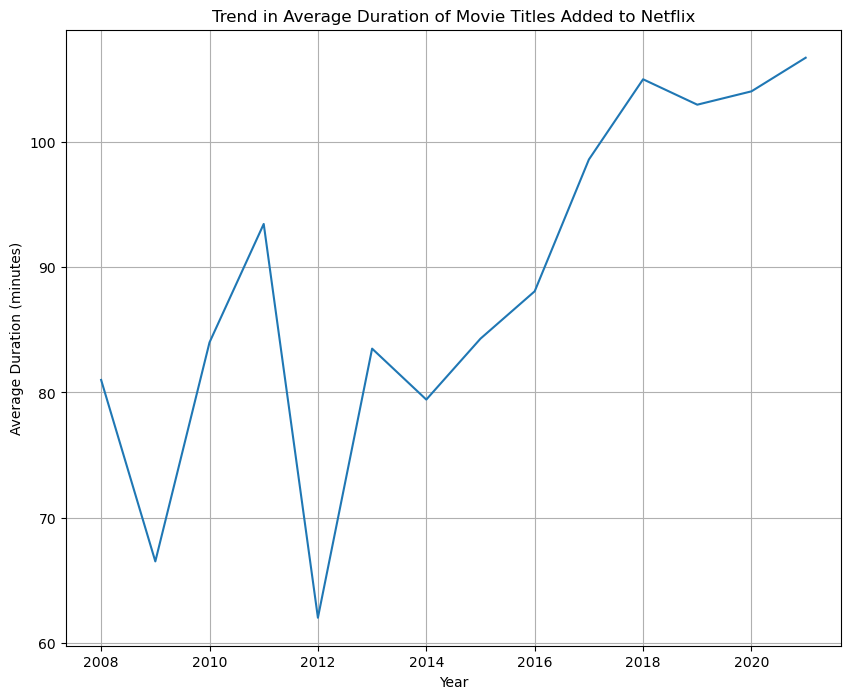

In [35]:
plt.figure(figsize=(10,8))

avg_dur_by_year = dfmovies.groupby('added_year')['duration_minutes'].mean().reset_index()

sea.lineplot(data=avg_dur_by_year, x='added_year', y='duration_minutes')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Trend in Average Duration of Movie Titles Added to Netflix')
plt.grid(True)
plt.show()

<h2>Predicting Future Trends in Movie Duration</h2>

<p>Using historical data, we predict the trend in average movie durations for the next three years. This prediction helps anticipate future content characteristics on Netflix.</p>

/Users/manikdevpokharel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/manikdevpokharel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


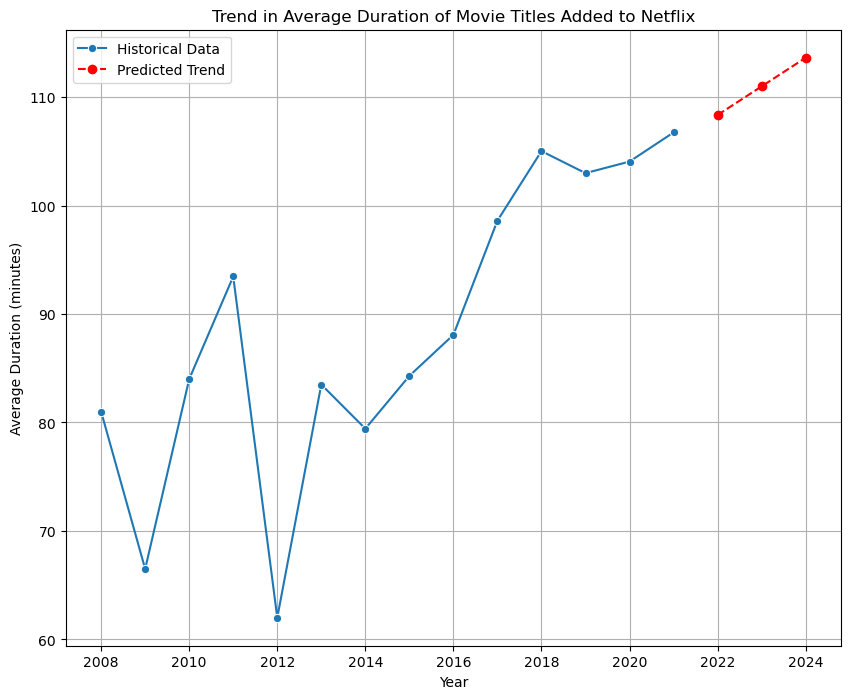

In [36]:
plt.figure(figsize=(10,8))

sea.lineplot(data=avg_dur_by_year, x='added_year', y='duration_minutes', marker='o', label='Historical Data')


next_three_years = np.arange(df['added_year'].max() + 1, df['added_year'].max() + 4)

trend_coefficients = np.polyfit(avg_dur_by_year['added_year'],avg_dur_by_year['duration_minutes'], 1)
pred_avg_dur = np.polyval(trend_coefficients, next_three_years)

# Plotting predicted trendn
plt.plot(next_three_years, pred_avg_dur, linestyle='--', color='r', marker='o', label='Predicted Trend')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Trend in Average Duration of Movie Titles Added to Netflix')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
for year, duration in zip(next_three_years, pred_avg_dur):
    print(f"Predicted average duration for {year}: {duration:.2f} minutes")

Predicted average duration for 2022: 108.35 minutes
Predicted average duration for 2023: 110.99 minutes
Predicted average duration for 2024: 113.63 minutes


<h1>Conclusion</h1>

This analysis provides a comprehensive overview of the content available on Netflix, highlighting key trends and insights. By understanding the distribution of content types, prolific directors, rating distributions, country contributions, and duration trends, we can better appreciate the platform's diverse offerings and anticipate future trends in content characteristics.